### 전국육교정보표준데이터
* 제각각 계산시 결측치 있는 샘플은 버림

    - 내진설계 된 육교 퍼센트
    - 안전등급별 육교 갯수, 비율
    - 육교가 만들어진 연도 vs 장애인편의시설 간 상관관계 연도, 장애인편의 시설 갖춘 육교의 갯수 / 해당 연도 건설 육교 갯수

    - 육교연장, 허용통행하중, 통행제한 높이에 대해
        최대, 최소값, 평균, 표준편차
        
            - 길이가 가장 긴 육교(육교 연장)
            - 가장 튼튼한 육교 (허용통행하중)
            - 가장 높은 유교 (통행제한 높이)

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def split_len(data_list):
    len_list = []
    for e in data_list:
        len_list.append(len(e))
    print(set(len_list))
    if len(set(len_list)) > 1:
        for i in set(len_list):
            print(i, len_list.count(i))  
    return set(len_list)  

In [71]:
csv_data = []
with open('전국육교정보표준데이터.csv') as f:
    for line in f:
        csv_data.append(my_split(line[:-1]))
print(csv_data[:3])
split_len(csv_data)

for e in enumerate(csv_data[0]):
    print(e)

np_data = np.array(csv_data)

[['육교명', '도로종류', '도로노선번호', '도로노선명', '소재지도로명주소', '위도', '경도', '육교연장', '육교높이', '허용통행하중', '통행제한높이', '육교폭', '난간높이', '조명개수', '장애인편의시설설치여부', '장애인편의시설종류', '장애인편의시설수량', '부대시설종류', '부대시설수량', '육교준공일자', '내진설계적용여부', '안전등급', '사용제한구분', '육교보수보강내역', '최종안전점검유형', '최종안전점검일자', '관리기관명', '데이터기준일자', '제공기관코드', '제공기관명'], ['우신초교 앞 보도육교', '시도', '147', '신길로', '서울특별시 영등포구 신길로 190', '37.509263', '126.910801', '23', '4.7', '', '4.5', '3.4', '1', '8', 'Y', '점자블록+핸드레일 촉지판', '24', '', '', '1980-09-18', ' ', '보통', '제한없음', '', '정기점검', '2022-04-16', '서울특별시 영등포구청', '2022-07-04', '3180000', '서울특별시 영등포구'], ['영등포역 횡단 보도육교', '기타', '없음', '경인선', '서울특별시 영등포구 경인로94길 7', '37.513895', '126.903695', '83', '', '0.5', '5.6', '3.2', '1.8', '14', 'Y', '엘리베이터', '', '', '', '1974-12-01', ' ', '보통', '제한없음', '', '정기점검', '2022-04-16', '서울특별시 영등포구청', '2022-07-04', '3180000', '서울특별시 영등포구']]
{30}
(0, '육교명')
(1, '도로종류')
(2, '도로노선번호')
(3, '도로노선명')
(4, '소재지도로명주소')
(5, '위도')
(6, '경도')
(7, '육교연장')
(8, '육교높이')
(9, '허용통행하중')
(10, '통행제한높이')
(11, '육교폭')
(1

In [72]:
# 내진설계

sub_data = np_data[1:, 20]
#print(sub_data[:3])

val, cnt = np.unique(sub_data, return_counts=True)
print(val, cnt)
print((cnt[1:] * 100)/ np.sum(cnt[1:]))

filter1 = sub_data != ' '
sub_data_f = sub_data[filter1] # 필터를 거쳐 true 값만 데이터가 저장되어 결측치가 없어짐

val, cnt = np.unique(sub_data_f, return_counts=True)
print(val, cnt)
print((cnt * 100)/ np.sum(cnt))


[' ' 'N' 'Y'] [357 695 166]
[80.72 19.28]
['N' 'Y'] [695 166]
[80.72 19.28]


In [73]:
# 안전등급별 육교 갯수
sub_data = np_data[1:, 21]

val, cnt = np.unique(sub_data, return_counts=True)
print(val, cnt)

cnt_percent = (cnt * 100) / np.sum(cnt)
print(cnt_percent)

val2 = np.expand_dims(val, 1)
print(val.shape, val2.shape)

cnt2 = cnt[:, np.newaxis]
print(cnt.shape, cnt2.shape)

cnt_percent2 = cnt_percent[:, np.newaxis]

jdata = np.concatenate((val2, cnt2, cnt_percent2), axis=1)
print(jdata)

filter1 = (np_data[:, 21] == '불량')
print(np_data[filter1])


['미흡' '보통' '불량' '양호' '우수'] [ 25 390   1 795   7]
[ 2.053 32.02   0.082 65.271  0.575]
(5,) (5, 1)
(5,) (5, 1)
[['미흡' '25' '2.052545155993432']
 ['보통' '390' '32.01970443349754']
 ['불량' '1' '0.08210180623973727']
 ['양호' '795' '65.27093596059113']
 ['우수' '7' '0.5747126436781609']]
[['갈평 보도육교' '기타' '경부선' '경부선' '경기도 평택시 서정동 432-3' '37.05929603'
  '127.0533613' '50' '' '' '8.5' '2.3' '' '' 'N' '없음' '' '없음' '' '' 'N'
  '불량' '사용제한' '' '정밀점검' '2020-12-30' '경기도 평택시' '2022-06-13' '3910000'
  '경기도 평택시']]


In [74]:
# 육교 연장, 허용통행하중, 통행제한높이 : 최소, 최대, 평균, 표준편차
print(np_data[0, 7:11])

# 육교 연장
# sub_data = np_data[:, 7:11]

# print('***', np_data[0, 7])
# sub_data = np_data[1:, 7]
# filter1 = sub_data != ''
# # print(np.unique(sub_data))
# sub_data_f = sub_data[filter1].astype(np.float64)
# # print(sub_data_f)
# print('최소:', np.min(sub_data_f))
# print('최대:', np.max(sub_data_f))
# print('평균:', np.mean(sub_data_f))
# print('표준편차:', np.std(sub_data_f))


for i in range(7, 11):
    print('***', np_data[0, i])
    sub_data = np_data[1:, i]
    filter1 = (sub_data != '') & (sub_data != '0') & (sub_data != '0.0')
    sub_data_f = sub_data[filter1].astype(np.float64)
    print('최소:', np.min(sub_data_f))
    print('최대:', np.max(sub_data_f))
    print('평균:', np.mean(sub_data_f))
    print('표준편차:', np.std(sub_data_f), '\n')

filter1 = (np_data[:, 8] == '150.0') | (np_data[:, 8] == '150')
print(np_data[filter1])

['육교연장' '육교높이' '허용통행하중' '통행제한높이']
*** 육교연장
최소: 5.3
최대: 693.6
평균: 50.67291845493562
표준편차: 40.366545219300704 

*** 육교높이
최소: 0.6
최대: 150.0
평균: 9.39847870967742
표준편차: 16.43855274916153 

*** 허용통행하중
최소: 0.34
최대: 225.0
평균: 7.741186915887851
표준편차: 21.923480558452354 

*** 통행제한높이
최소: 1.4
최대: 50.0
평균: 4.913341750841751
표준편차: 2.3497046582175938 

[['안곡육교' '기타' '' '중산로' '경기도 고양시 일산동구 중산로 147-1' '37.685252' '126.7808247'
  '150' '150' '' '4.5' '4.9' '' '' 'Y' '경사로' '1' '없음' '' '2006-05-29' 'N'
  '양호' '제한없음' '' '정기점검' '2022-05-16' '경기도 고양시청' '2022-11-10' '3940000'
  '경기도 고양시']]


In [75]:
# 연도별 장애인편의시설 여부, 상관관계
sub_data = np_data[1:, [14, 19]] # 특정 인덱스 2개 넣는 법
# print(sub_data)

# 결측치 확인
# np.unique(sub_data[:, 1])

# 결측치 제거
filter1 = sub_data[:, 1] != ''
sub_data = sub_data[filter1]

year_yn = []
for yn, ymd in sub_data:
    yr = ymd.split('-')[0]
    year_yn.append(yr + '-' + yn)
# print(year_yn)

year_yn = np.array(year_yn)
val, cnt = np.unique(year_yn, return_counts=True)
print(val, cnt)

['1968-N' '1970-N' '1970-Y' '1971-N' '1972-N' '1974-Y' '1976-N' '1977-N'
 '1977-Y' '1978-Y' '1980-N' '1980-Y' '1982-N' '1983-N' '1984-N' '1986-Y'
 '1987-N' '1987-Y' '1988-N' '1988-Y' '1989-N' '1989-Y' '1990-N' '1991-N'
 '1991-Y' '1992-N' '1992-Y' '1993-N' '1993-Y' '1994-N' '1994-Y' '1995-N'
 '1995-Y' '1996-N' '1996-Y' '1997-N' '1997-Y' '1998-N' '1998-Y' '1999-N'
 '1999-Y' '2000-N' '2000-Y' '2001-N' '2001-Y' '2002-N' '2002-Y' '2003-N'
 '2003-Y' '2004-N' '2004-Y' '2005-N' '2005-Y' '2006-N' '2006-Y' '2007-N'
 '2007-Y' '2008-N' '2008-Y' '2009-N' '2009-Y' '2010-N' '2010-Y' '2011-N'
 '2011-Y' '2012-N' '2012-Y' '2013-Y' '2014-N' '2014-Y' '2015-N' '2015-Y'
 '2016-N' '2016-Y' '2017-Y' '2018-N' '2018-Y' '2019-Y' '2020-N' '2020-Y'
 '2021-Y' '2022-Y'] [ 1  1  1  2  1  1  1  2  1  1  3  1  2  1  3  8  3  2  4  3  3  4  4  8
  2 28 19 26 21 16 11 16  7 33 17 29 24 29 15 14  9  8 10 13 13  8 14 11
 17  9 17  6 21  7 26  6 18  8 28 16 29 10 18  6 16  8 23  9  6  7  2  9
  4 15  4  3  7  3  1  5  1  3]

### pass1
{
    year: [y, n, ...]
}

### pass2
[
    [year, y_count, ratio]
]

In [78]:
sub_data = np_data[1:, [14, 19]]
filter1 = sub_data[:, 1] != ''
sub_data = sub_data[filter1]

pass1 = dict()
for yn, ymd in sub_data:
    yr = ymd.split('-')[0]
    if yr in pass1.keys():
        pass1[yr].append(yn)
    else:
        pass1[yr] = [yn]
# print(pass1)

pass2 = []
for yr in pass1:    # dict 순환시 key값으로 순환
    val, cnt = np.unique(pass1[yr], return_counts=True)
    y, ratio = 0, 0     # 초기화
    if 'Y' in val:
        y = (cnt[val == 'Y'])
    ratio = y / np.sum(cnt)
    pass2.append((int(yr), int(y), float(ratio)))

# print(pass2)
np.set_printoptions(precision = 3, suppress=True)

pass3 = sorted(pass2, key = lambda x: x[0])
pass3 = np.array(pass3)
print(pass3)

[[1968.       0.       0.   ]
 [1970.       1.       0.5  ]
 [1971.       0.       0.   ]
 [1972.       0.       0.   ]
 [1974.       1.       1.   ]
 [1976.       0.       0.   ]
 [1977.       1.       0.333]
 [1978.       1.       1.   ]
 [1980.       1.       0.25 ]
 [1982.       0.       0.   ]
 [1983.       0.       0.   ]
 [1984.       0.       0.   ]
 [1986.       8.       1.   ]
 [1987.       2.       0.4  ]
 [1988.       3.       0.429]
 [1989.       4.       0.571]
 [1990.       0.       0.   ]
 [1991.       2.       0.2  ]
 [1992.      19.       0.404]
 [1993.      21.       0.447]
 [1994.      11.       0.407]
 [1995.       7.       0.304]
 [1996.      17.       0.34 ]
 [1997.      24.       0.453]
 [1998.      15.       0.341]
 [1999.       9.       0.391]
 [2000.      10.       0.556]
 [2001.      13.       0.5  ]
 [2002.      14.       0.636]
 [2003.      17.       0.607]
 [2004.      17.       0.654]
 [2005.      21.       0.778]
 [2006.      26.       0.788]
 [2007.   

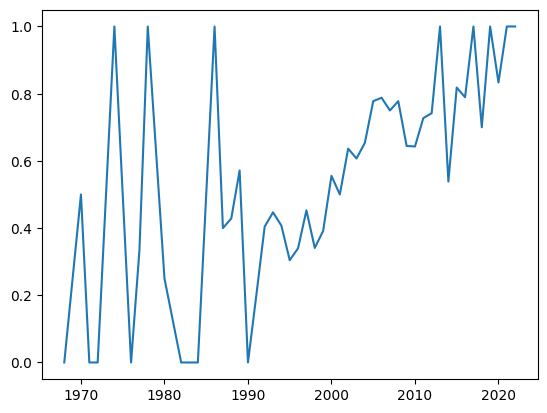

In [84]:
_,axe = plt.subplots()
# axe.plot(pass3[:, 0], pass3[:,1])
axe.plot(pass3[:, 0], pass3[:,2])

In [85]:
# 상관관계
# print(pass3)
filter1 = pass3[:, 0] >= 1990
pass4 = pass3[filter1]
# print(pass4)
print(np.corrcoef(pass4[:, 0], pass4[:, 2]))

# 해가 지날수록 장애인편의 시설 설치율이 증가함

[[1.    0.885]
 [0.885 1.   ]]


*** 육교연장
[ 23.   83.   40.  ...  32.4  53.5 121.5]
중앙값: 39.6
quantile: [30.  39.6 56. ]
iqr: 95.0
lower: -9.0


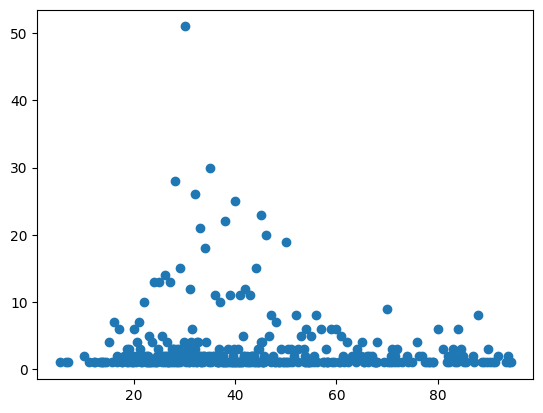

In [97]:
# iqr, outliers (이상치) - 정상적이지 않은 값

i = 7
print('***', np_data[0, i])
sub_data = np_data[1:, i]
filter1 = (sub_data != '') & (sub_data != '0') & (sub_data != '0.0')    # 결측치
sub_data_f = sub_data[filter1].astype(np.float64)

# print('최소:', np.min(sub_data_f))
# print('최대:', np.max(sub_data_f))
# print('평균:', np.mean(sub_data_f))
# print('표준편차:', np.std(sub_data_f), '\n')

# 중앙값은 이상치의 영향을 덜 받음
print(sub_data_f)
print('중앙값:', np.median(sub_data_f))
print('quantile:', np.quantile(sub_data_f, [.25, .5, .75]))
#                                           25%  50%  75%   - 갯수상의 위치
# iqr : 75 - 25
q25, q50, q75 = np.quantile(sub_data_f, [.25, .5, .75])
iqr = q75 - q25
print('iqr:', q75+1.5*iqr)      # 95.0
print('lower:', q25-1.5*iqr)    # -9.0 -> 음수이므로 하한 이상치가 없음
'''

-----------------------q25-----------------------q50-----------------------q75-----------------------
    하한선:q25-1.5*iqr                                                          상한선:q75+1.5*iqr
이상치 - 상한선보다 높거나 하한선보다 낮은 값
'''
upper = q75 + 1.5 * iqr
sub_data_cut = sub_data_f[sub_data_f < upper]

# 육교 연장의 분포
# val, cnt = np.unique(sub_data_f, return_counts=True)
val, cnt = np.unique(sub_data_cut, return_counts=True)

_, axe = plt.subplots()
axe.scatter(val, cnt)


[  3   9  30  64 100 189 124 103 118  57  62  35  31  23  31  12  17  23
  18  11] [ 5.3   9.76 14.22 18.68 23.14 27.6  32.06 36.52 40.98 45.44 49.9  54.36
 58.82 63.28 67.74 72.2  76.66 81.12 85.58 90.04 94.5 ]


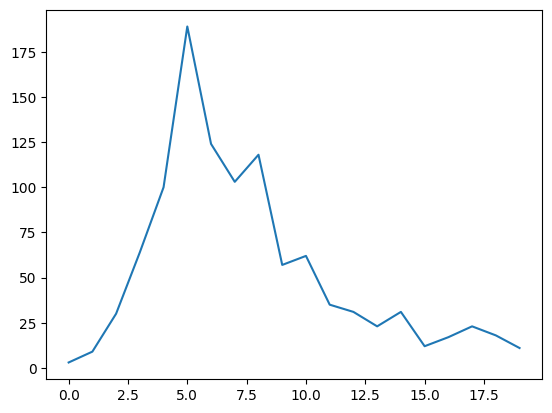

In [103]:
# binscount를 이용해서 histogram
upper = q75 + 1.5 * iqr
sub_data_cut = sub_data_f[sub_data_f < upper]

h_cnt, h_bins = np.histogram(sub_data_cut, bins=20)
print(h_cnt, h_bins)

# 육교 연장의 분포
val, cnt = np.unique(sub_data_cut, return_counts=True)

_, axe = plt.subplots()
# axe.scatter(val, cnt)
axe.plot(np.arange(20), h_cnt)

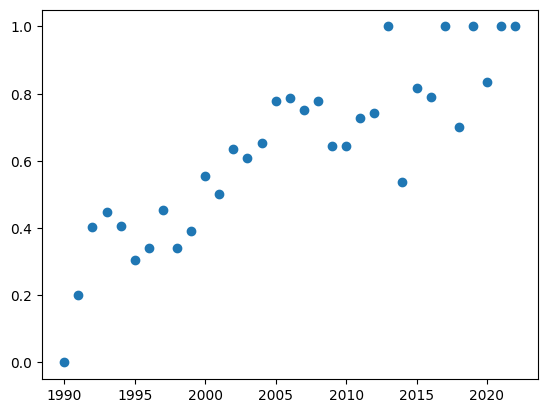

In [102]:
_,axe = plt.subplots()
# axe.plot(pass3[:, 0], pass3[:,1])
axe.scatter(pass4[:, 0], pass4[:,2])